### About

Working with energy efficiency dataset related to residential buildings. Based on publication ['Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools'](https://scholar.google.com/scholar?hl=en&q=A.+Tsanas%2C+A.+Xifara%3A+%27Accurate+quantitative+estimation+of+energy+performance+of+residential+buildings+using+statistical+machine+learning+tools%27%2C+Energy+and+Buildings%2C+Vol.+49%2C+pp.+560-567%2C+2012&btnG=&as_sdt=1%2C5&as_sdtp=) by A. Tsanas and A. Xifara published in Energy and Buildings, Vol. 49, pp. 560-567, 2012.

### Links

* [Energy efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)


### Description of Dataset

#### Data Set Information

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

#### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. 

Specifically: 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
* X4	Roof Area 
* X5	Overall Height 
* X6	Orientation 
* X7	Glazing Area 
* X8	Glazing Area Distribution 
* y1	Heating Load 
* y2	Cooling Load



### Overall Data Analysis Approach

* A. Prelimenary Statistical Analysis
	1. Make charts with probability density estimate in order to see that data are not distributed normally (non-Gaussian).
	2. Make scatter plots with correlations in order to show visually that it's hardly traceable.
	3. Report with tables filled with values that mutual information and correlations coefficients are properly holding.
	4. Create table with matrix showing correlations between input variables (covariance matrix).
* B. Machine Learning
	5. Obtain coefficients for final model within the 100 random tries (via cross-validation's K-fold) to see that they are stable.
	6. For each machine learning method (IRLS, Random Forest) and each measuring method (MAE, MSE, MRE) calculate mean and standard deviation, which then should be averaged over all attempts made (x100).

### Loading Data

The first step is always a data loading. Before loading data was converted from original Excel file into CSV.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
pd.options.display.float_format = '{:,.3f}'.format

# plot default size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

dataset = pd.read_csv('data/ENB2012-data-uci.csv', sep=';')

columns = ['X1 Relative Compactness',
           'X2 Surface Area',
           'X3 Wall Area',
           'X4 Roof Area',
           'X5 Overall Height',
           'X6 Orientation',
           'X7 Glazing Area',
           'X8 Glazing Area Distribution',
           'y1 Heating Load',
           'y2 Cooling Load']

mapping = {'X1' : columns[0], 
           'X2' : columns[1],
           'X3' : columns[2],
           'X4' : columns[3],
           'X5' : columns[4],
           'X6' : columns[5],
           'X7' : columns[6],
           'X8' : columns[7],
           'Y1' : columns[8],
           'Y2' : columns[9]}

mapping = collections.OrderedDict(sorted(mapping.items()))

# just for further simplisity
target_cols_X = [mapping[x] for x in mapping if x[0] != 'Y']
target_cols_Y = [mapping[x] for x in mapping if x[0] == 'Y']

In [2]:
dataset.columns = columns
print ('columns:\n{0}'.format('\n'.join(dataset.columns)))
dataset.head(5)

columns:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load


,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution,y1 Heating Load,y2 Cooling Load
0,0.980,514.500,294.000,110.250,7.000,2,0.000,0,15.550,21.330
1,0.980,514.500,294.000,110.250,7.000,3,0.000,0,15.550,21.330
2,0.980,514.500,294.000,110.250,7.000,4,0.000,0,15.550,21.330
3,0.980,514.500,294.000,110.250,7.000,5,0.000,0,15.550,21.330
4,0.900,563.500,318.500,122.500,7.000,2,0.000,0,20.840,28.280


In [3]:
# obtaining data description

dataset.describe()

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution,y1 Heating Load,y2 Cooling Load
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,0.764,671.708,318.500,176.604,5.250,3.500,0.234,2.812,22.307,24.588
std,0.106,88.086,43.626,45.166,1.751,1.119,0.133,1.551,10.090,9.513
min,0.620,514.500,245.000,110.250,3.500,2.000,0.000,0.000,6.010,10.900
25%,0.682,606.375,294.000,140.875,3.500,2.750,0.100,1.750,12.992,15.620
50%,0.750,673.750,318.500,183.750,5.250,3.500,0.250,3.000,18.950,22.080
75%,0.830,741.125,343.000,220.500,7.000,4.250,0.400,4.000,31.668,33.133
max,0.980,808.500,416.500,220.500,7.000,5.000,0.400,5.000,43.100,48.030


In [4]:
# Math representation of the input and output variables
# shows how many uniques values in each column

for column in columns:
    print ('{0}\t\t\t\t{1}'.format(column, len(set(dataset[column]))))

X1 Relative Compactness				12
X2 Surface Area				12
X3 Wall Area				7
X4 Roof Area				4
X5 Overall Height				2
X6 Orientation				4
X7 Glazing Area				4
X8 Glazing Area Distribution				6
y1 Heating Load				586
y2 Cooling Load				636


### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A093F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A0EBAC8>]], dtype=object)

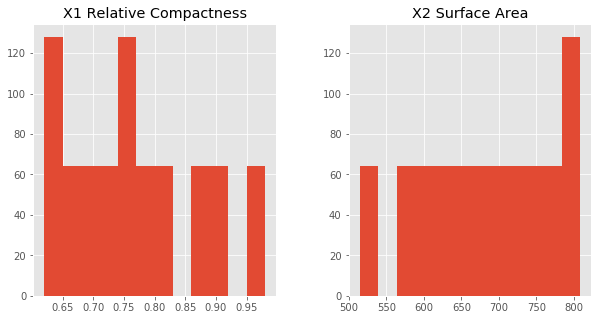

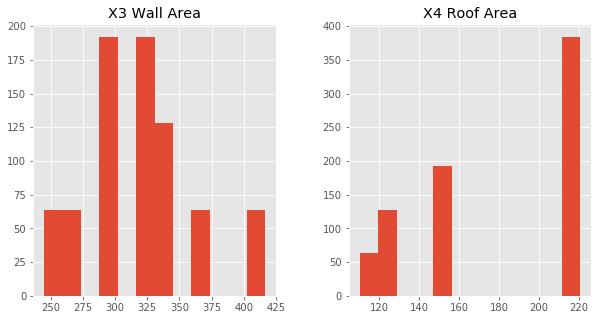

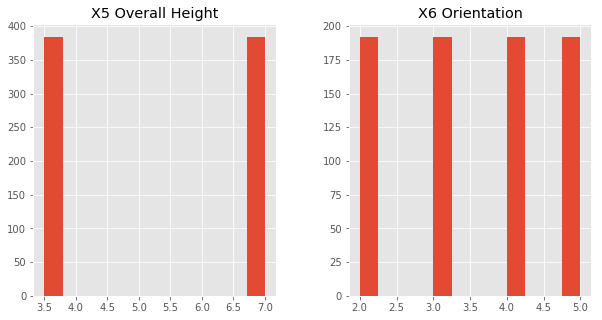

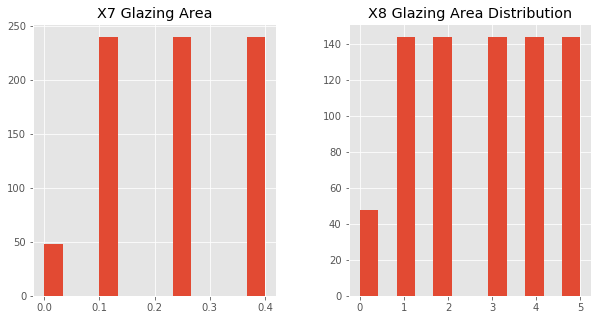

In [5]:
dataset[[mapping["X1"], mapping["X2"]]].hist(bins=12, figsize = (10,5))
dataset[[mapping["X3"], mapping["X4"]]].hist(bins=12, figsize = (10,5))
dataset[[mapping["X5"], mapping["X6"]]].hist(bins=12, figsize = (10,5))
dataset[[mapping["X7"], mapping["X8"]]].hist(bins=12, figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A12A748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B6A3F28>]], dtype=object)

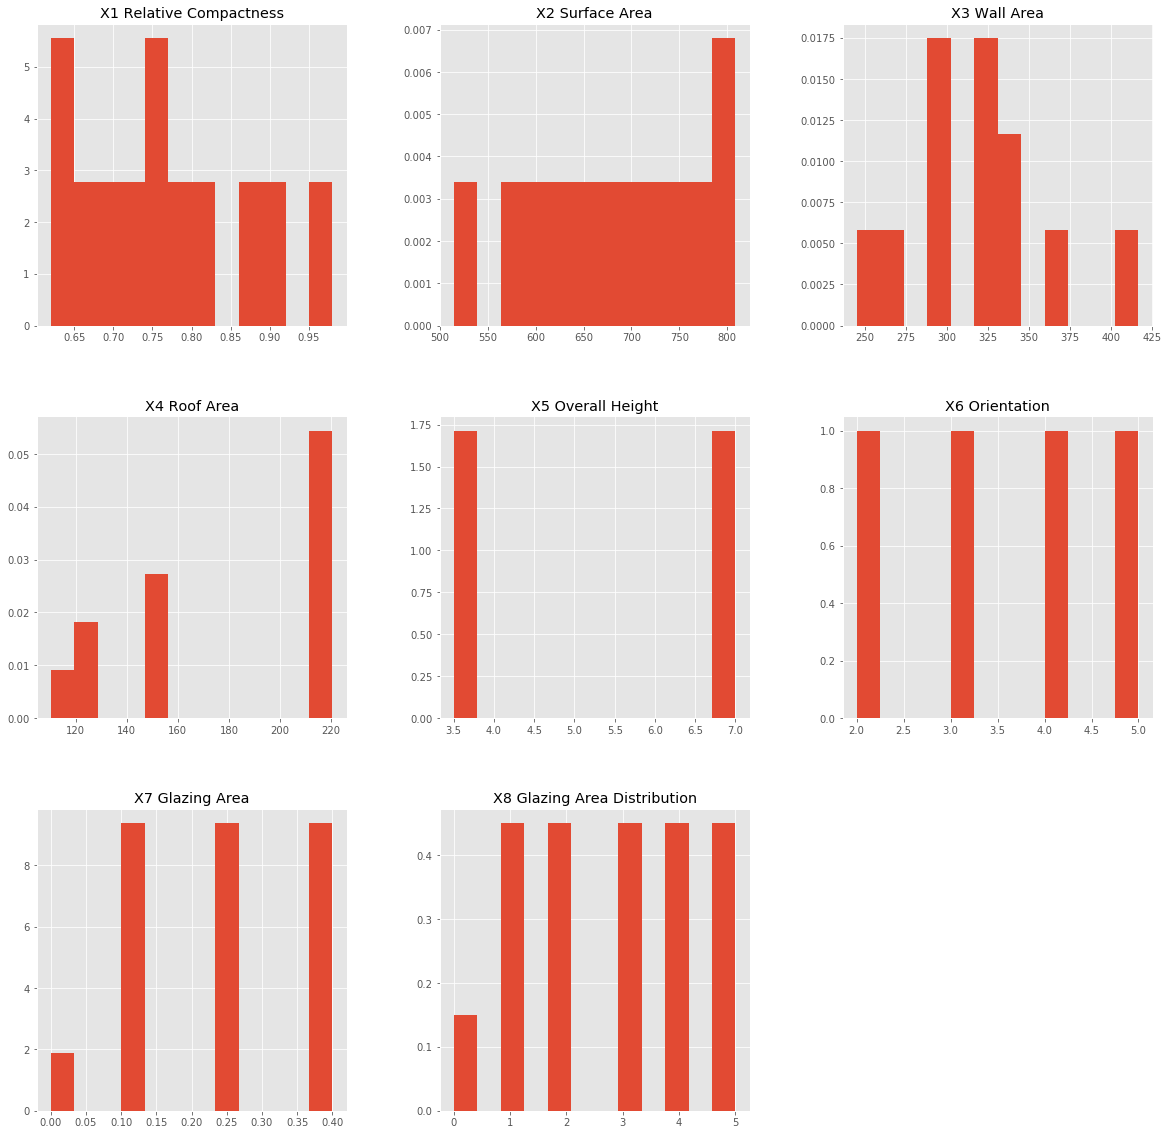

In [6]:
# different view of histograms (normalized)

#dataset[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]].hist(bins=10, figsize = (10,10) , normed=1)
dataset[target_cols_X].hist(bins=12, figsize = (20,20), normed=1)

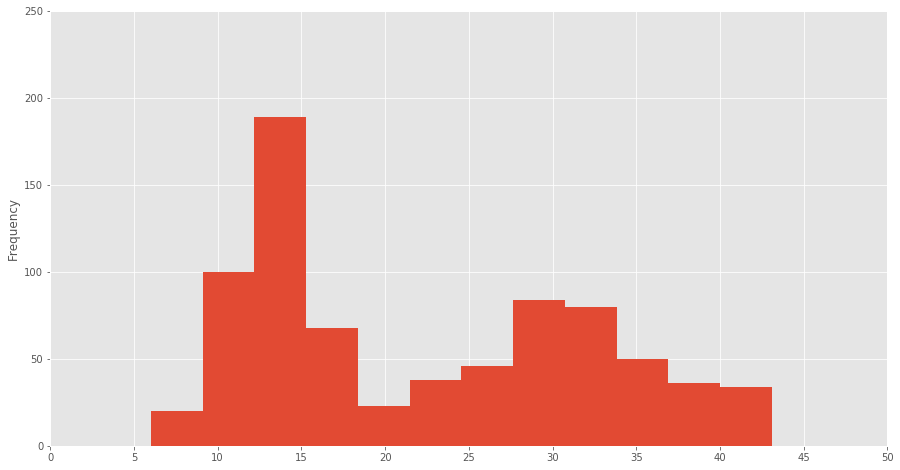

In [7]:
_xticks = (0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50)
_yticks = (0, 50, 100, 150, 200, 250)
dataset[mapping['Y1']].plot(kind = 'hist', bins=12, xticks= _xticks, yticks= _yticks)

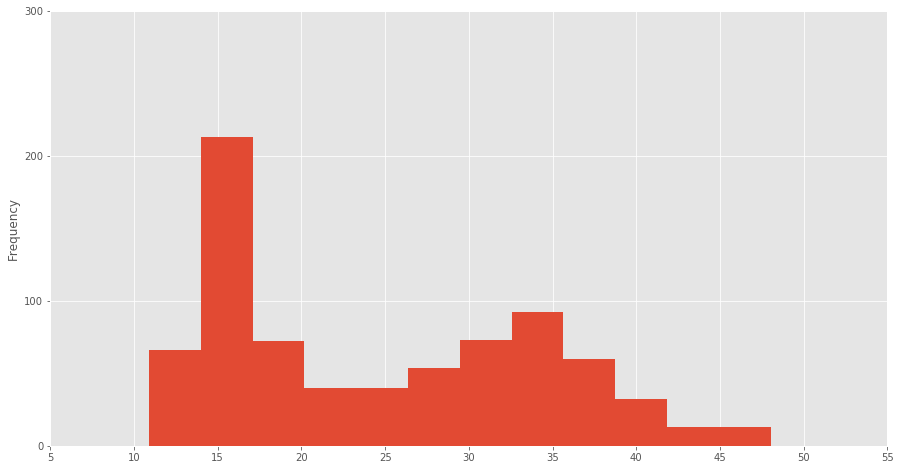

In [8]:
_xticks = (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55)
_yticks = (0, 100, 200, 300)
dataset[mapping['Y2']].plot(kind = 'hist', bins=12, xticks= _xticks, yticks= _yticks)

### Data Preprocessing

More about data preprocessing can be found in section [4.3. Preprocessing data](http://scikit-learn.org/stable/modules/preprocessing.html) of the scikit-learn or in article [About Feature Scaling and Normalization](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html).

In [9]:
# standardizing input data

from sklearn import preprocessing

df_scaled = preprocessing.scale(dataset)
df_scaled2 = pd.DataFrame(df_scaled)
df_scaled2.describe()

,0,1,2,3,4,5,6,7,8,9
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.364,-1.786,-1.686,-1.470,-1.000,-1.342,-1.760,-1.815,-1.616,-1.440
25%,-0.773,-0.742,-0.562,-0.792,-1.000,-0.671,-1.009,-0.686,-0.924,-0.943
50%,-0.134,0.023,0.000,0.158,0.000,0.000,0.117,0.121,-0.333,-0.264
75%,0.623,0.789,0.562,0.973,1.000,0.671,1.244,0.766,0.928,0.899
max,2.042,1.554,2.248,0.973,1.000,1.342,1.244,1.411,2.062,2.466


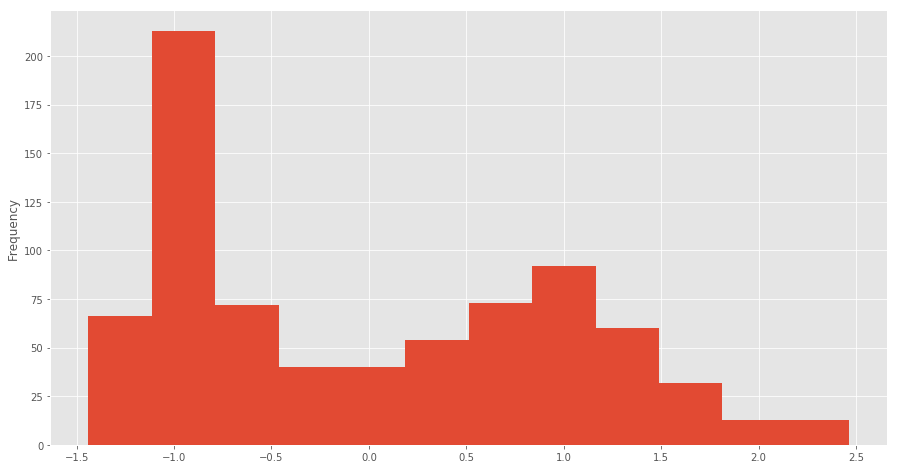

In [10]:
_xticks = (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55)
_yticks = (0, 100, 200, 300)
df_scaled2[9].plot(kind = 'hist', bins=12)#, xticks= _xticks, yticks= _yticks)

In [11]:
# normalization - v1

min_max_scaler = preprocessing.MinMaxScaler()
df_normed = min_max_scaler.fit_transform(dataset.values)
df_normed2 = pd.DataFrame(df_normed)
df_normed2.describe()

,0,1,2,3,4,5,6,7,8,9
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,0.400,0.535,0.429,0.602,0.500,0.500,0.586,0.562,0.439,0.369
std,0.294,0.300,0.254,0.410,0.500,0.373,0.333,0.310,0.272,0.256
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.174,0.312,0.286,0.278,0.000,0.250,0.250,0.350,0.188,0.127
50%,0.361,0.542,0.429,0.667,0.500,0.500,0.625,0.600,0.349,0.301
75%,0.583,0.771,0.571,1.000,1.000,0.750,1.000,0.800,0.692,0.599
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [12]:
# normalization - v2

df_tmp = preprocessing.normalize(dataset, axis=0)
df_normed3 = pd.DataFrame(df_tmp)
df_normed3.describe()

,0,1,2,3,4,5,6,7,8,9
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,0.036,0.036,0.036,0.035,0.034,0.034,0.031,0.032,0.033,0.034
std,0.005,0.005,0.005,0.009,0.011,0.011,0.018,0.017,0.015,0.013
min,0.029,0.027,0.028,0.022,0.023,0.020,0.000,0.000,0.009,0.015
25%,0.032,0.032,0.033,0.028,0.023,0.027,0.013,0.020,0.019,0.021
50%,0.035,0.036,0.036,0.036,0.034,0.034,0.033,0.034,0.028,0.030
75%,0.039,0.039,0.039,0.044,0.046,0.042,0.054,0.045,0.047,0.045
max,0.046,0.043,0.047,0.044,0.046,0.049,0.054,0.056,0.064,0.066


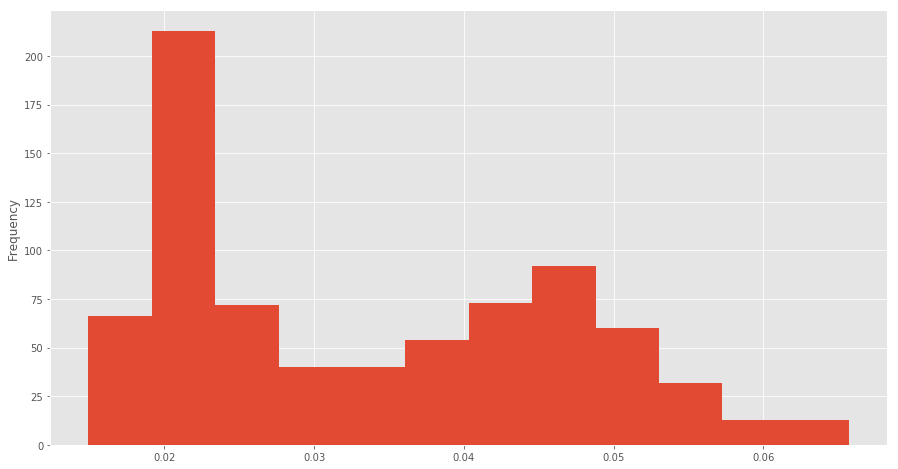

In [13]:
_xticks = (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55)
_yticks = (0, 100, 200, 300)
df_normed3[9].plot(kind = 'hist', bins=12)#, xticks= _xticks, yticks= _yticks)

In [14]:
#df_normed = df_normed3
df_normed = df_scaled2
df_normed
df_normed.columns = columns

Comparing all input values with output **'y1 Heating Load'** and **'y2 Cooling Load'**

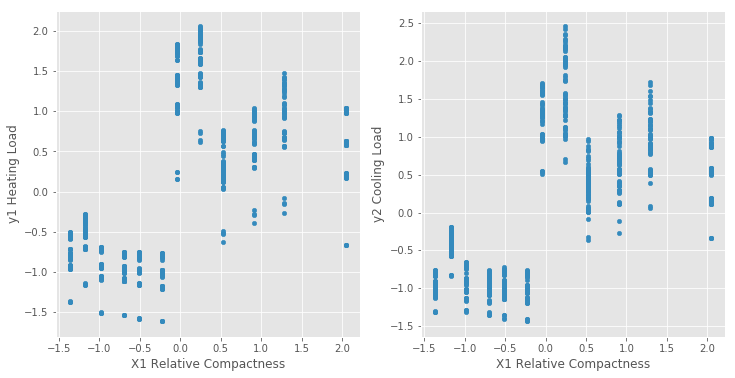

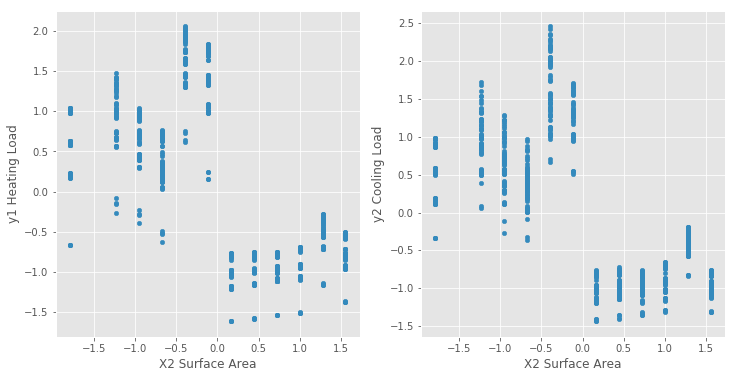

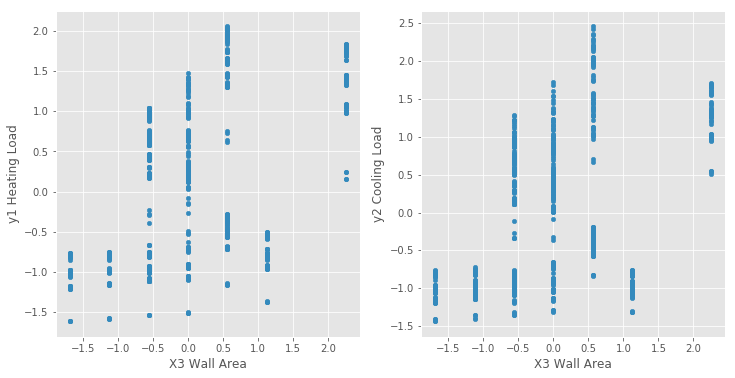

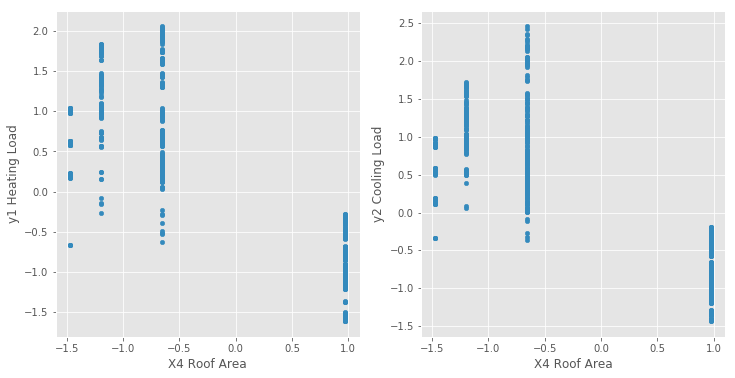

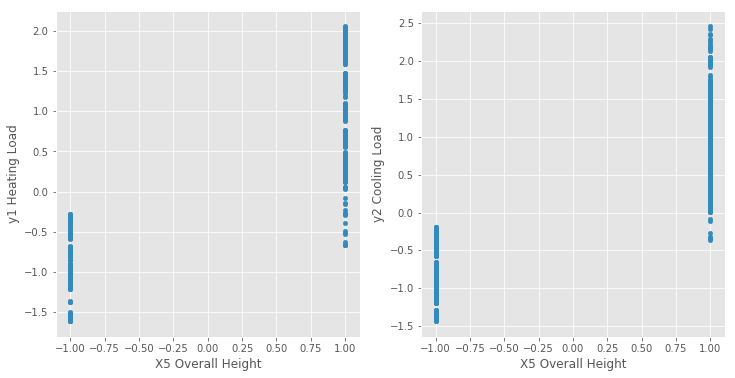

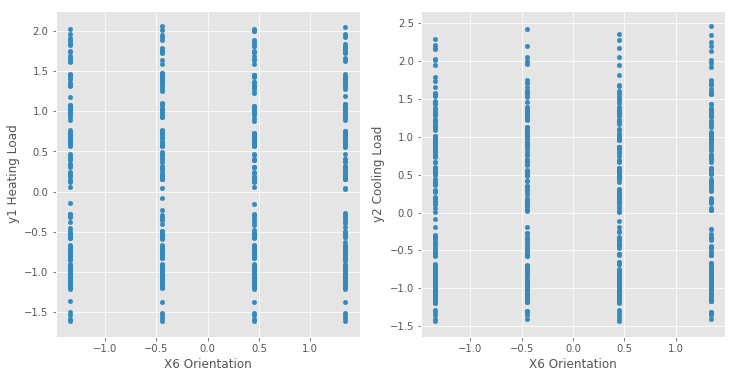

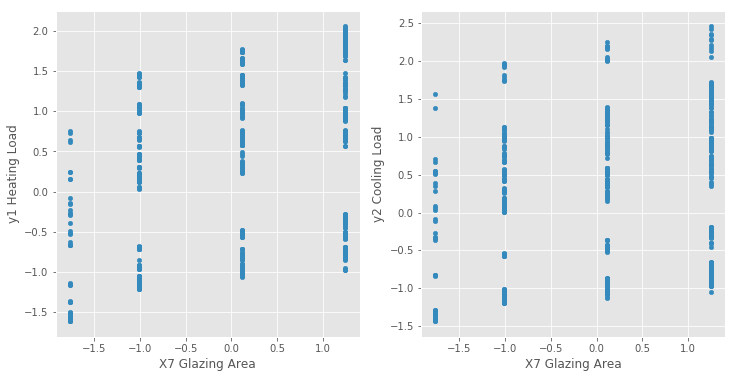

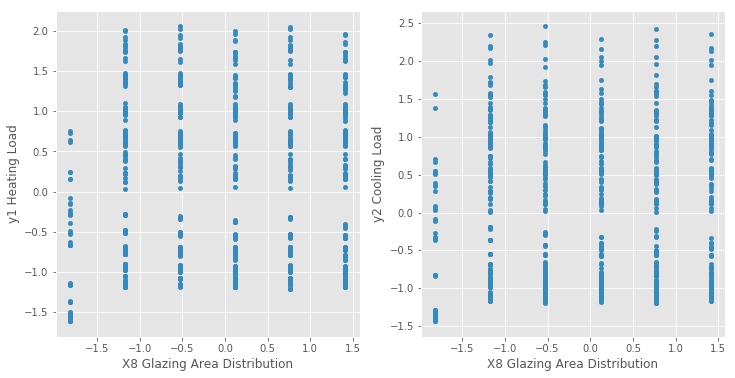

In [15]:
for key in mapping:
    
    if key[0] != 'Y':
        fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize = (12,6))
        df_normed.plot.scatter(x=mapping[key], y=mapping["Y1"], ax=ax1, grid=True)
        df_normed.plot.scatter(x=mapping[key], y=mapping["Y2"], ax=ax2, grid=True)

### Correlations

After plotting data various ways, it's make sense to prove correlation between input variables and output onces.

In [16]:
print ('Correlation with Y1:')
for key in mapping:
    if key[0] != 'Y':
        cor_spearman_y = df_normed[mapping[key]].corr(df_normed[mapping["Y1"]], method='spearman')
        print ('{spearman:.3f}\t{feature}'.format(feature=mapping[key], spearman=cor_spearman_y))
        
print ('\nCorrelation with Y2:')
for key in mapping:
    if key[0] != 'Y':
        cor_spearman_y = df_normed[mapping[key]].corr(df_normed[mapping["Y2"]], method='spearman')
        print ('{spearman:.3f}\t{feature}'.format(feature=mapping[key], spearman=cor_spearman_y))

Correlation with Y1:
0.622	X1 Relative Compactness
-0.622	X2 Surface Area
0.471	X3 Wall Area
-0.804	X4 Roof Area
0.861	X5 Overall Height
-0.004	X6 Orientation
0.323	X7 Glazing Area
0.068	X8 Glazing Area Distribution

Correlation with Y2:
0.651	X1 Relative Compactness
-0.651	X2 Surface Area
0.416	X3 Wall Area
-0.803	X4 Roof Area
0.865	X5 Overall Height
0.018	X6 Orientation
0.289	X7 Glazing Area
0.046	X8 Glazing Area Distribution


In [17]:
# correlation matrix

df_normed[target_cols_X].corr(method='spearman')

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution
X1 Relative Compactness,1.000,-1.000,-0.256,-0.871,0.869,0.000,0.000,0.000
X2 Surface Area,-1.000,1.000,0.256,0.871,-0.869,0.000,0.000,0.000
X3 Wall Area,-0.256,0.256,1.000,-0.193,0.221,0.000,0.000,0.000
X4 Roof Area,-0.871,0.871,-0.193,1.000,-0.937,0.000,0.000,0.000
X5 Overall Height,0.869,-0.869,0.221,-0.937,1.000,0.000,0.000,0.000
X6 Orientation,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
X7 Glazing Area,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.188
X8 Glazing Area Distribution,0.000,0.000,0.000,0.000,0.000,0.000,0.188,1.000


#### NOTE

Rest of the metrics that are calculated within the paper were left out, because they are not adding any values to current context (but in statistical sense of data they are important).

## Training Machine Learning Models

Metrics that are going to be used in order to measure resulting models:

* Mean Squared  Error (MSE)

    $$\textrm{MSE} = \frac{1}{n} \times \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

* Mean Absolute Error (MAE)

    $$\textrm{MAE} = \frac{1}{n} \times \sum_{i=1}^{n} |y_i - \hat{y}_i)|$$

* Mean Relative Error (MRE)

    $$\textrm{MRE} = 100 \times \frac{1}{n} \times \sum_{i=1}^{n} |\frac{y_i - \hat{y}_i}{y_i}|$$
    
    $$\hat{y}_i - \textrm{predicted value}$$
    $$y_i - \textrm{given / real value}$$

#### Random Forest Classification

More information about random forest in scikit learn can be found [1.11.2. Forests of randomized trees](http://scikit-learn.org/stable/modules/ensemble.html#forest)


In [22]:
def rf_regressor(target_output):
    """ Using Random Forest with Regressors.  
    
        Detailed information here:
            - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
    """
    
    if target_output not in ("Y1", "Y2"):
        print ('No such output variable column existing.')
        return None
        
    import sklearn
    import pandas as pd
    from sklearn import model_selection
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    # data
    X =  dataset[target_cols_X].values
    Y =  dataset[mapping[target_output]].values

    # splitting in train and test 
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state = 1)
    
    # parameters
    seed         = 7
    max_features = 8
    num_trees    = 50
    
    rf = RandomForestRegressor(n_estimators=num_trees, max_features=max_features, verbose=0)
    # 
    rf_model = rf.fit(X_train, Y_train)
    
    print ('MSE (unseen): {0}'.format(mean_squared_error(rf_model.predict(X_test), Y_test)))
    print ('MAE (unseen): {0}'.format(mean_absolute_error(rf_model.predict(X_test), Y_test)))
    
    coef_part = (100 * (1/Y_test.size))
    sum_part = sum((abs(rf_model.predict(X_test) - Y_test)) / Y_test)
    print ('MRE (unseen): {0}'.format(coef_part * sum_part))
    
    
#     kfold = model_selection.KFold(n_splits=num_splits, random_state=seed)
#     results = model_selection.cross_val_score(model, X, Y, cv=kfold)

    num_splits   = 10
    results = model_selection.cross_val_score(rf, X, Y, cv=num_splits)
    
    print (results)
    print('\nRF Mean Results: {0}\n\n'.format(results.mean()))   
    print('Accuracy: %0.2f (+/- %0.2f)' % (results.mean(), results.std() * 2))
    
    #model.fit(X, Y)
    #print (model.decision_path(X))
    #print (rf.get_params())

rf_regressor(target_output='Y1')
# rf_regressor(target_output="Y1")
# rf_regressor(target_output="Y2")

MSE (unseen): 0.2716297743749998
MAE (unseen): 0.3803718750000005
MRE (unseen): 1.6370934342537455
[ 0.721  0.998  0.997  0.996  0.997  0.997  0.998  0.997  0.995  0.996]

RF Mean Results: 0.9691778935013973


Accuracy: 0.97 (+/- 0.17)
